In [878]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [879]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.width", 500)

In [880]:
data = pd.read_csv("spotify-2023.csv", encoding = "latin-1")
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [881]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

_The column named "released_month" is given as int64. But there are only 12 months, not more. So we can use this column as categorical._

In [883]:
def int_to_month_name(month_integer):
    month_names = ["", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    return month_names[month_integer]

In [884]:
data["released_month"] = data["released_month"].apply(int_to_month_name)

_It seems the column named "released_day" isn't an important variable. We can drop it._

In [886]:
data.drop(axis = 1, columns = "released_day" ,inplace = True)

**Missing Values**

In [888]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

_The column "in_shazam_charts" includes presence and rank of the song on Shazam charts. This can be null value because a song might never be on shazam. But a song always has a key. So this value can't be null._

In [890]:
data["in_shazam_charts"].fillna(0, inplace = True)

_We fill null values with "-" because any random assign for "key" might be wrong._

In [892]:
data["key"].fillna("-", inplace = True)

In [893]:
data.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

**Categorical Analysis**

In [895]:
def categoric_data(dataframe, cat_th = 12, car_th=20):
    cat_cols = [col for col in dataframe.columns if str(dataframe.dtypes[col]) in ["category", "bool", "object"]]
    num_but_cat = [col for col in dataframe.columns if str(dataframe.dtypes[col]) in ["int64", "float64"] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe.dtypes[col]) in ["category", "object"] and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variebles: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [896]:
cat_cols, num_cols, cat_but_car, num_but_cat = categoric_data(data)

Observations: 953
Variebles: 23
cat_cols: 4
num_cols: 14
cat_but_car: 5
num_but_cat: 1


In [897]:
[data[col].value_counts() for col in cat_cols]

[January      134
 May          128
 March         86
 June          86
 November      80
 December      75
 October       73
 April         66
 July          62
 February      61
 September     56
 August        46
 Name: released_month, dtype: int64,
 C#    120
 G      96
 -      95
 G#     91
 F      89
 B      81
 D      81
 A      75
 F#     73
 E      62
 A#     57
 D#     33
 Name: key, dtype: int64,
 Major    550
 Minor    403
 Name: mode, dtype: int64,
 1    587
 2    254
 3     85
 4     15
 5      5
 6      3
 8      2
 7      2
 Name: artist_count, dtype: int64]

In [898]:
cat_but_car

['track_name',
 'artist(s)_name',
 'streams',
 'in_deezer_playlists',
 'in_shazam_charts']

_"streams" variable must be numeric._

In [900]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

In [901]:
data['streams'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype  
--------------  -----  
952 non-null    float64
dtypes: float64(1)
memory usage: 7.6 KB


In [902]:
data['streams'].head()

0   141381703.00
1   133716286.00
2   140003974.00
3   800840817.00
4   303236322.00
Name: streams, dtype: float64

In [903]:
cat_cols, num_cols, cat_but_car, num_but_cat = categoric_data(data)

Observations: 953
Variebles: 23
cat_cols: 4
num_cols: 15
cat_but_car: 4
num_but_cat: 1


In [904]:
cat_but_car

['track_name', 'artist(s)_name', 'in_deezer_playlists', 'in_shazam_charts']

_'in_deezer_playlists' and 'in_shazam_charts' variables also must be numeric data but we won't use them in this work. So we can leave them that way._

**Visualization**

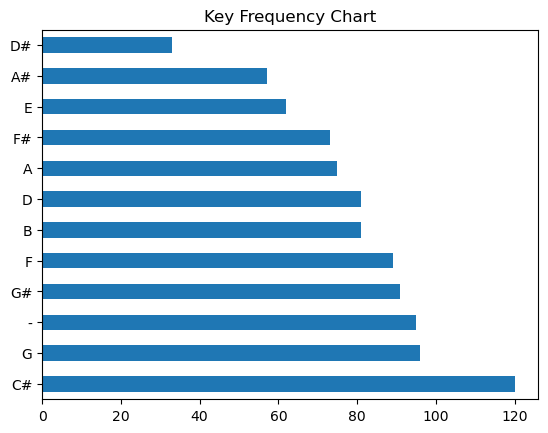

In [907]:
data["key"].value_counts().plot.barh().set_title("Key Frequency Chart");

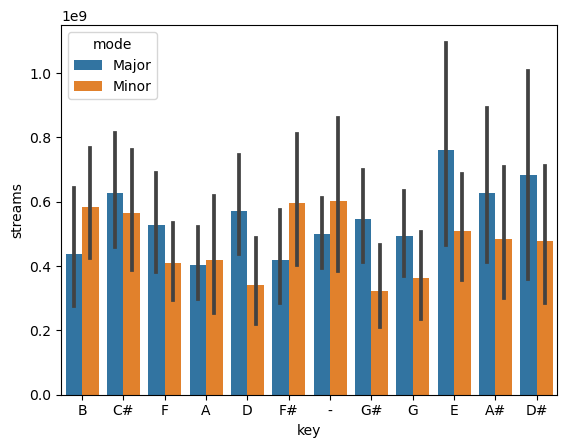

In [908]:
sns.barplot(x = "key", y= "streams", hue= "mode", data=data);

In [909]:
percentage_variables = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]

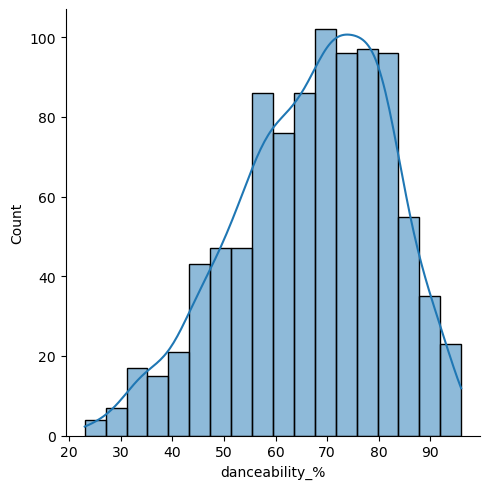

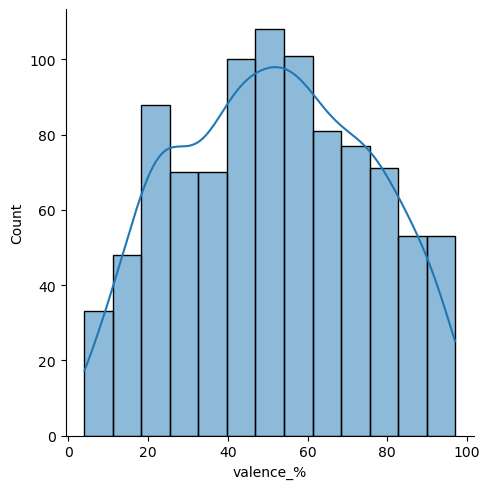

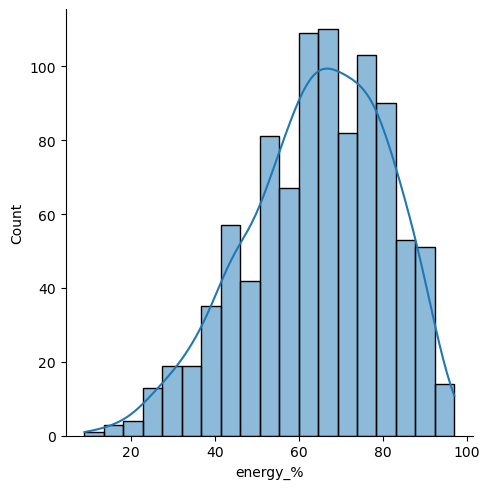

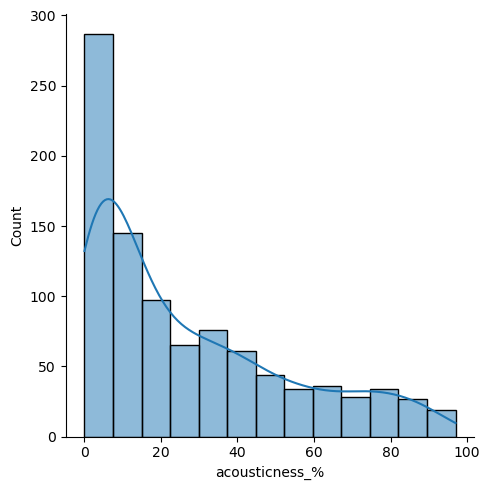

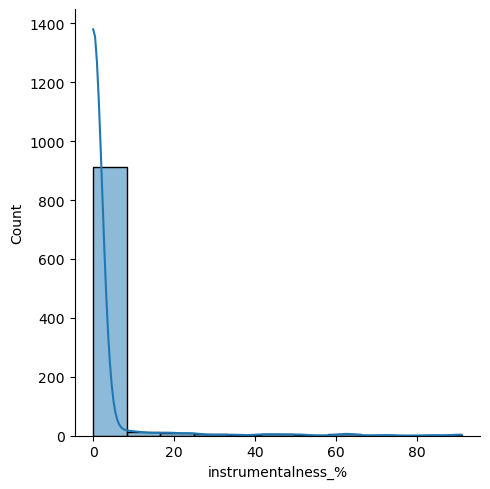

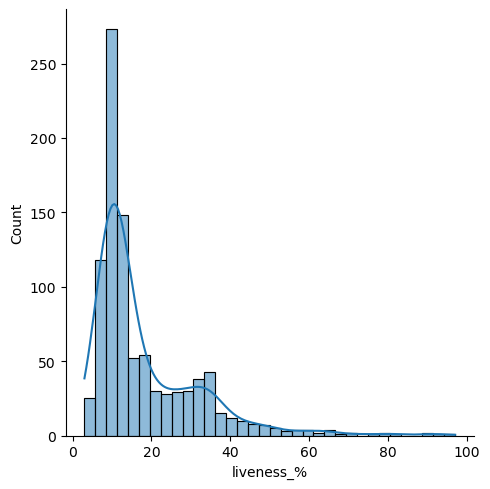

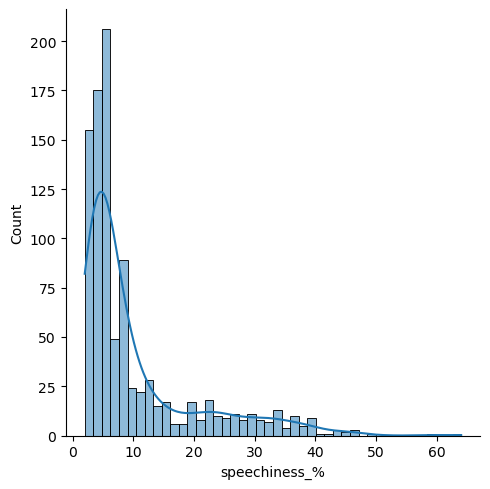

In [910]:
([sns.displot(data[i], kde = True) for i in percentage_variables]);

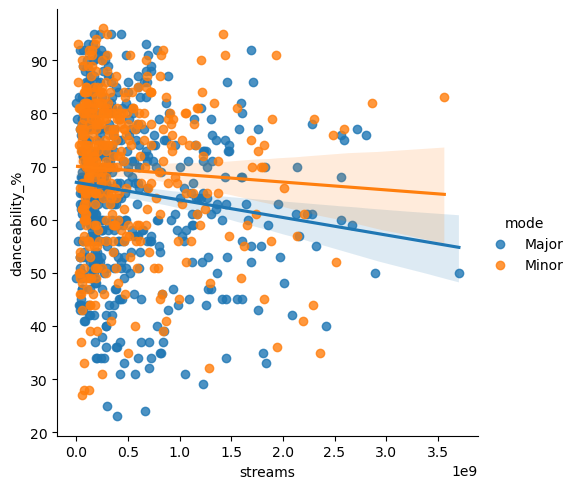

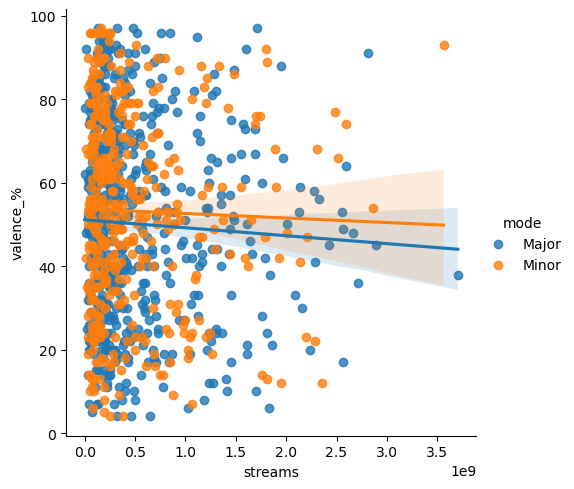

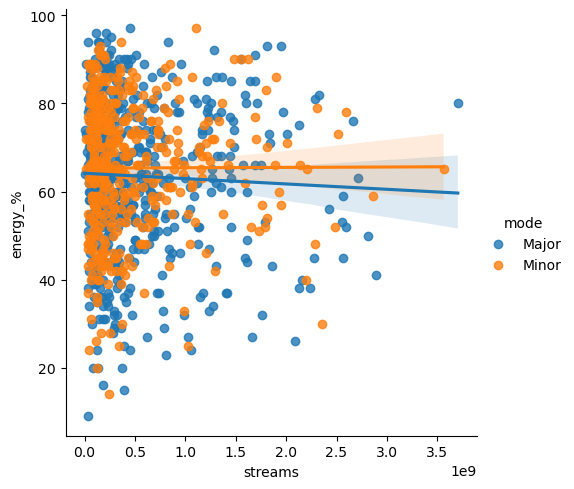

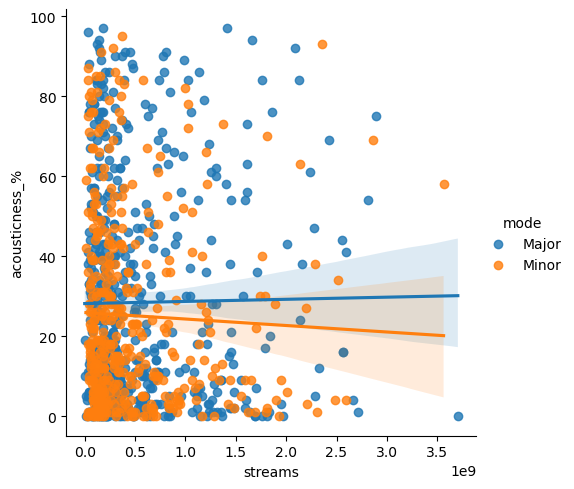

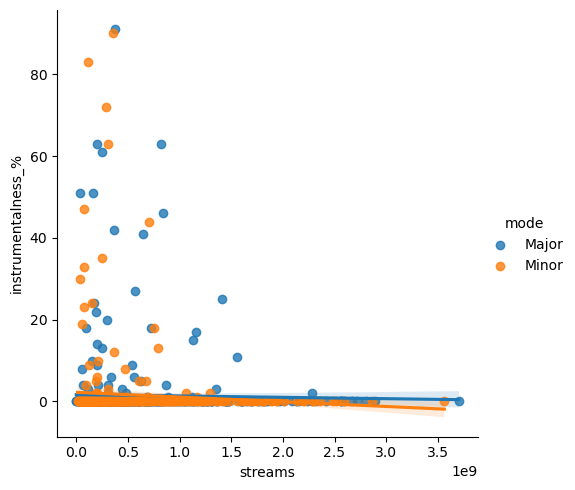

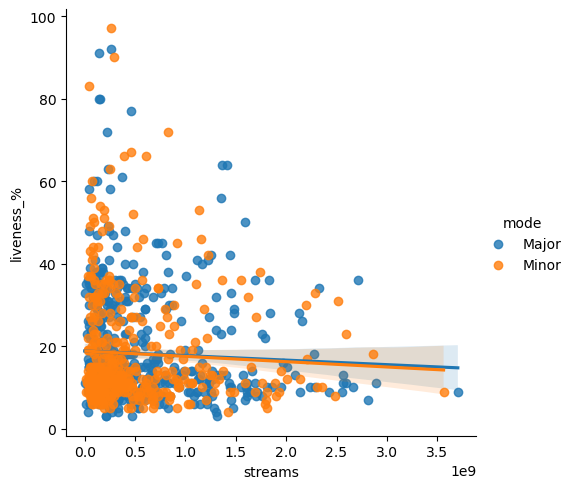

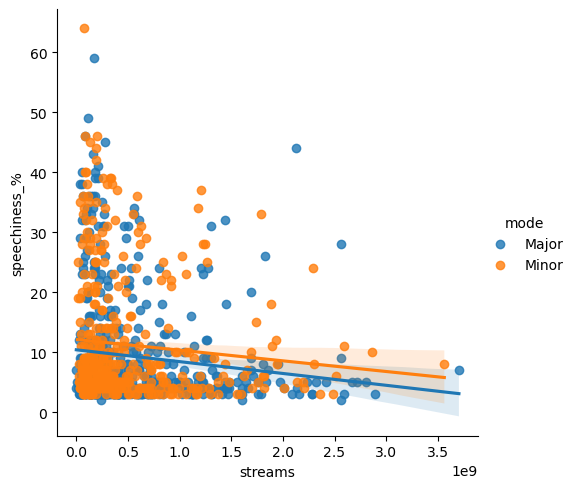

In [911]:
([sns.lmplot(x = "streams", y = i, hue = "mode" ,data = data) for i in percentage_variables]);

_There is no significant relation between "danceability", "valence", "energy", "acousticness", "instrumentalness", "liveness", "speechiness" and "streams" on different modes._

In [913]:
percentage_variables.append("bpm")
numeric_variables = percentage_variables
numeric_variables

['danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%',
 'bpm']

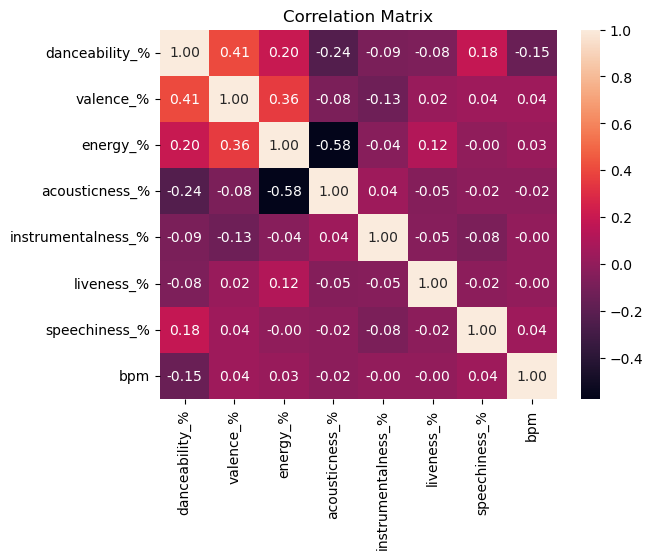

In [914]:
corr_matrix = data[numeric_variables].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

_There is a significant inverse relationship between acoustics and energy._

In [916]:
data['track_artist'] = data['track_name'] + " - " + data['artist(s)_name']

In [917]:
most_stream_songs = data.groupby("track_artist")["streams"].max().sort_values(ascending = False).head(10)

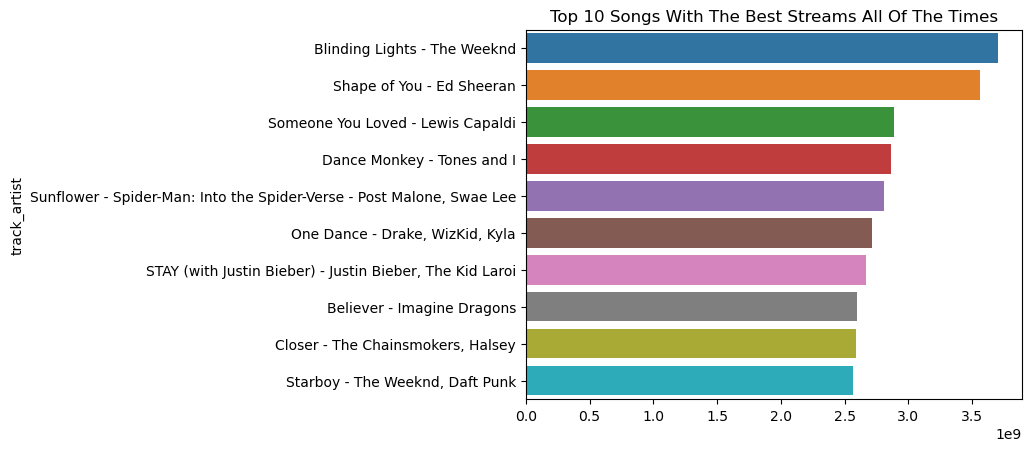

In [918]:
sns.barplot(x = most_stream_songs.values, y = most_stream_songs.index);
plt.title("Top 10 Songs With The Best Streams All Of The Times")
plt.show()

In [919]:
most_stream_artist = data.groupby("artist(s)_name")["streams"].sum().sort_values(ascending = False).head(10)

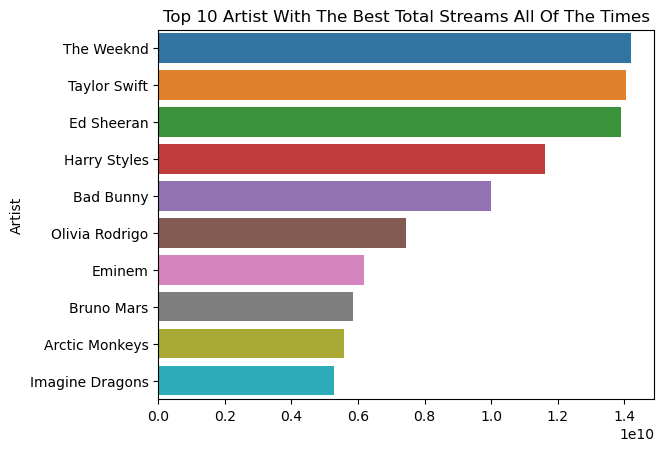

In [920]:
sns.barplot(x = most_stream_artist.values, y = most_stream_artist.index);
plt.title("Top 10 Artist With The Best Total Streams All Of The Times")
plt.ylabel("Artist")
plt.show()

In [921]:
most_added_song_in_spotify = data.groupby("track_artist")["in_spotify_playlists"].max().sort_values(ascending = False).head(10)

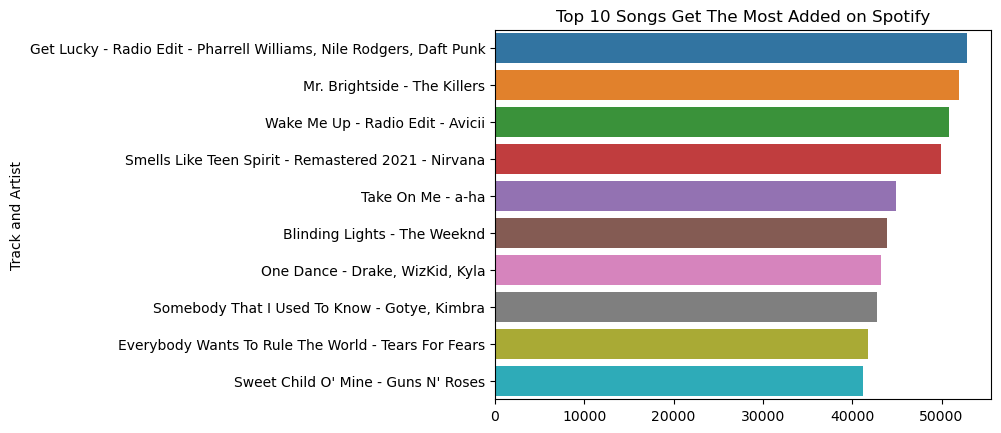

In [922]:
sns.barplot(x = most_added_song_in_spotify.values, y = most_added_song_in_spotify.index);
plt.title("Top 10 Songs Get The Most Added on Spotify")
plt.ylabel("Track and Artist")
plt.show()

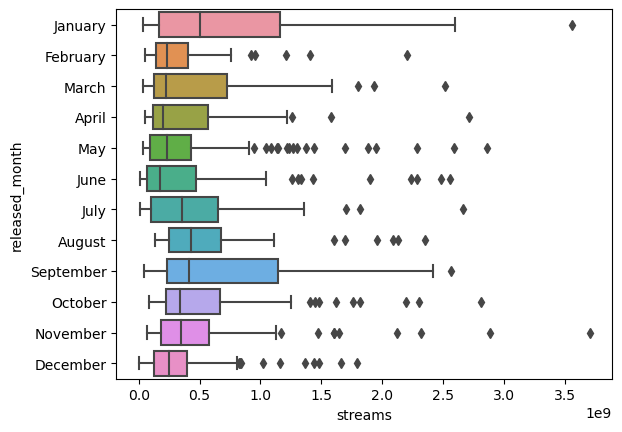

In [923]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.boxplot(x = "streams", y = "released_month", data = data, order = months);

_Average stream is highest in January. But "most streamed song" is released in November._

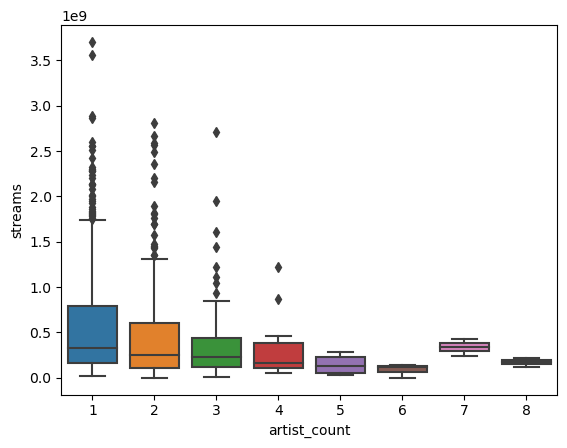

In [925]:
sns.boxplot(x = "artist_count", y = "streams", data = data);

_If we consider the songs that 2 and more artists worked together, 7 artist collaborations are the best average stream_

In [927]:
seven_artists = data[(data.artist_count == 7)]
seven_artists

,track_name,artist(s)_name,artist_count,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_artist
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,November,2785,0,432719968.00,95,89,44,0,0,206,-,Minor,58,83,45,36,0,11,8,"We Don't Talk About Bruno - Adassa, Mauro Cast..."
667,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7,2022,January,1034,1,245400167.00,19,5,12,0,0,174,F,Minor,67,74,75,44,0,7,30,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab..."


_We can see that one of these 2 songs is released in November and the other is in January which we found out that these months get the highest streams before._

In [1047]:
decade = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
last_decade = data[data['released_year'].isin(decade)]

In [1085]:
songs_count = pd.pivot_table(last_decade, index = ["released_year"], values = ["track_artist"], aggfunc = "count")
songs_count

,track_artist
released_year,
2014,13
2015,11
2016,18
2017,23
2018,10
2019,36
2020,37
2021,119
2022,402


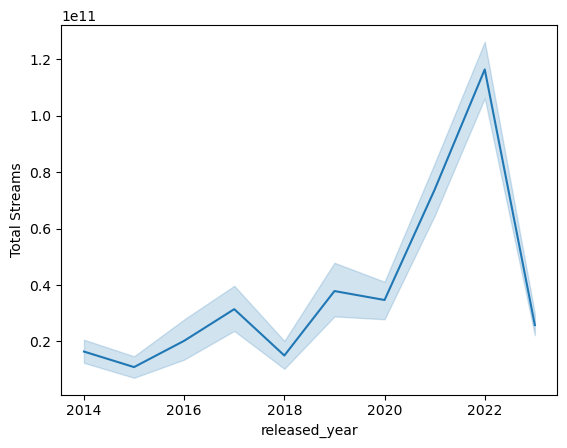

In [1096]:
sns.lineplot(x = "released_year", y = "streams", data=last_decade, estimator = "sum");
plt.ylabel("Total Streams")
plt.show()

*THE BEST SONGS EACH YEAR*

*2023*

In [933]:
year_2023 = data[(data.released_year == 2023)]
best_2023 = year_2023.sort_values(by = "streams", ascending = False).head(10)

In [934]:
year_2023.released_month.unique()

array(['July', 'March', 'June', 'May', 'April', 'January', 'February'],
      dtype=object)

_Year 2023 is based until July_

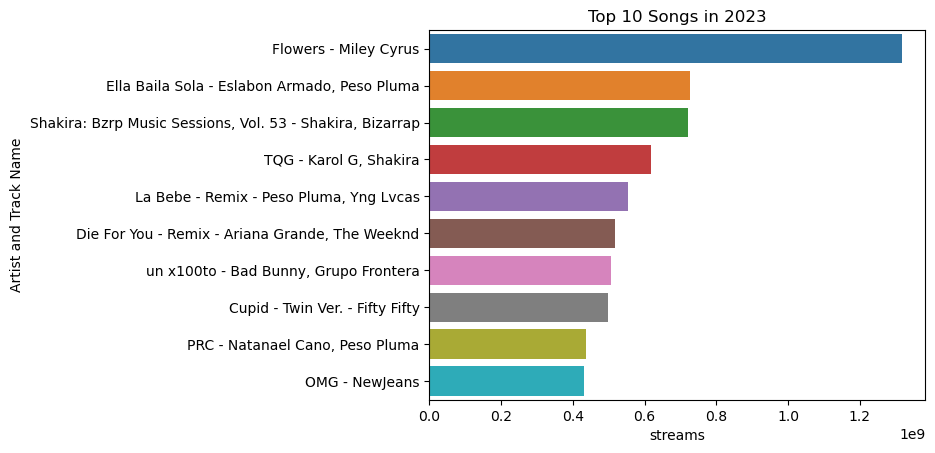

In [936]:
sns.barplot(x= "streams", y = "track_artist", data = best_2023);
plt.title("Top 10 Songs in 2023")
plt.ylabel("Artist and Track Name")
plt.show()

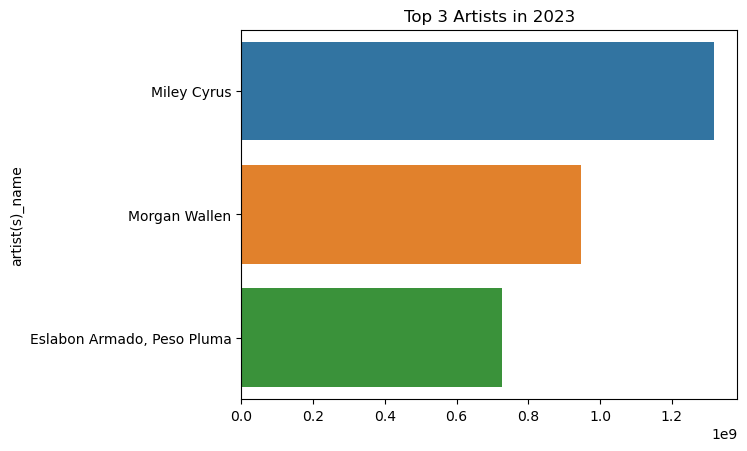

In [1033]:
best_artist_2023 = year_2023.groupby("artist(s)_name")["streams"].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2023.values, y = best_artist_2023 .index);
plt.title("Top 3 Artists in 2023")
plt.show()

*2022*

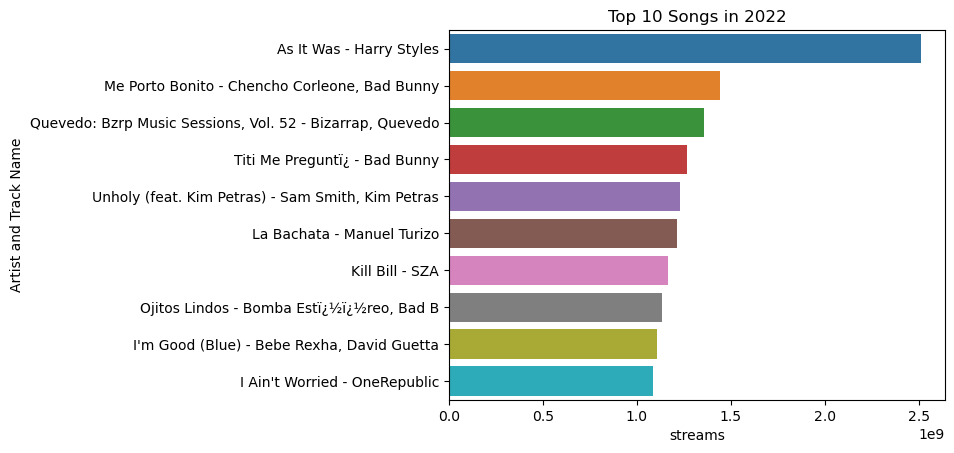

In [938]:
year_2022 = data[(data.released_year == 2022)]
best_2022 = year_2022.sort_values(by = "streams", ascending = False).head(10)
sns.barplot(x= "streams", y = "track_artist", data = best_2022);
plt.title("Top 10 Songs in 2022")
plt.ylabel("Artist and Track Name")
plt.show()

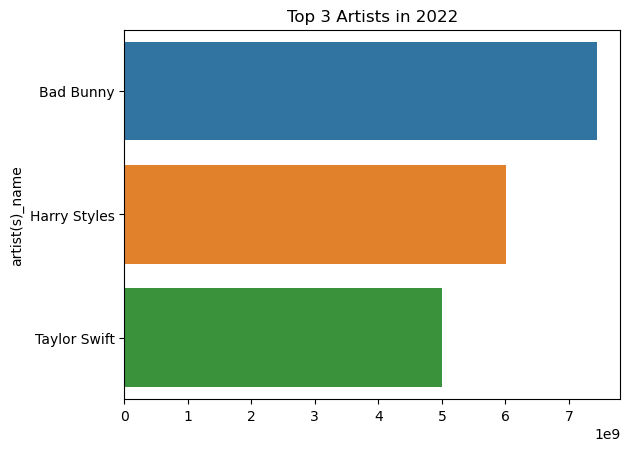

In [1035]:
best_artist_2022 = year_2022.groupby("artist(s)_name")["streams"].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2022.values, y = best_artist_2022.index);
plt.title("Top 3 Artists in 2022")
plt.show()

*2021*

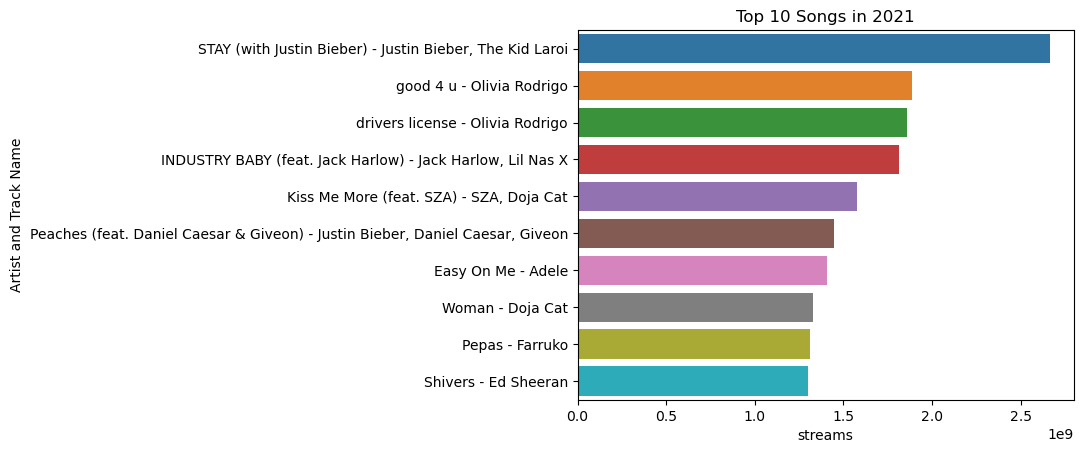

In [940]:
year_2021 = data[(data.released_year == 2021)]
best_2021 = year_2021.sort_values(by = "streams", ascending = False).head(10)
sns.barplot(x= "streams", y = "track_artist", data = best_2021);
plt.title("Top 10 Songs in 2021")
plt.ylabel("Artist and Track Name")
plt.show()

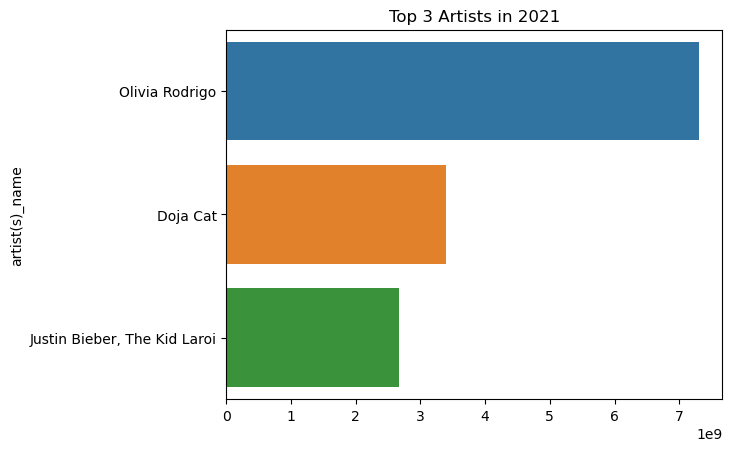

In [1037]:
best_artist_2021 = year_2021.groupby("artist(s)_name")["streams"].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2021.values, y = best_artist_2021.index);
plt.title("Top 3 Artists in 2021")
plt.show()

*2020*

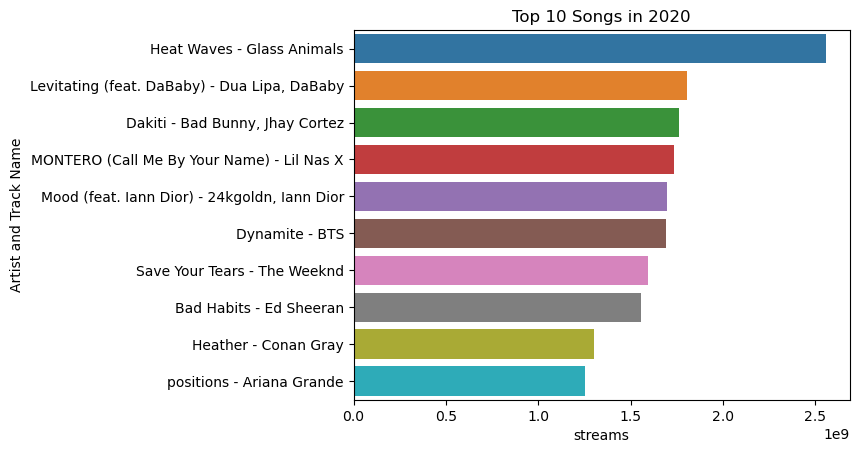

In [942]:
year_2020 = data[(data.released_year == 2020)]
best_2020 = year_2020.sort_values(by = "streams", ascending = False).head(10)
sns.barplot(x= "streams", y = "track_artist", data = best_2020);
plt.title("Top 10 Songs in 2020")
plt.ylabel("Artist and Track Name")
plt.show()

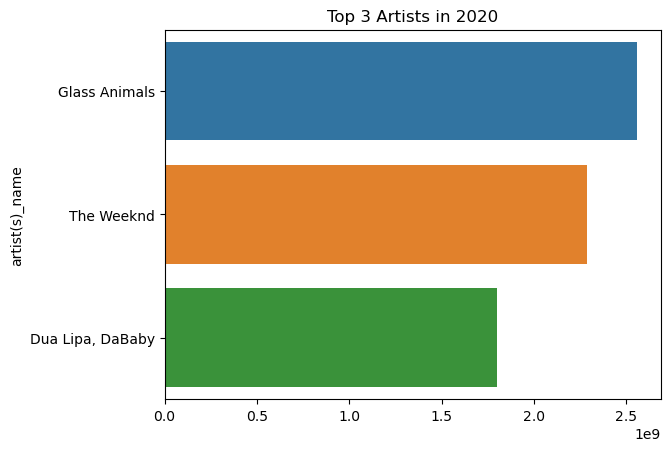

In [1039]:
best_artist_2020 = year_2020.groupby("artist(s)_name")["streams"].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2020.values, y = best_artist_2020.index);
plt.title("Top 3 Artists in 2020")
plt.show()

*2019*

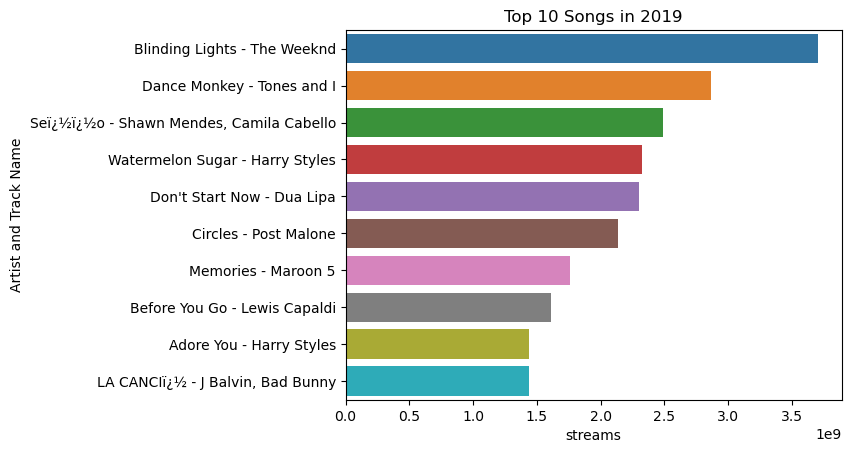

In [944]:
year_2019 = data[(data.released_year == 2019)]
best_2019 = year_2019.sort_values(by = "streams", ascending = False).head(10)
sns.barplot(x= "streams", y = "track_artist", data = best_2019);
plt.title("Top 10 Songs in 2019")
plt.ylabel("Artist and Track Name")
plt.show()

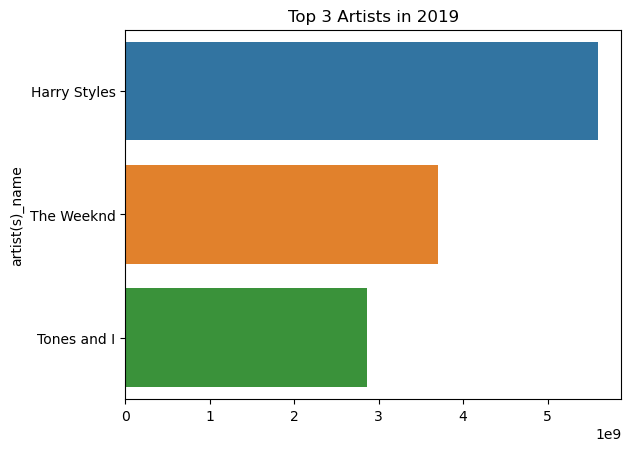

In [1041]:
best_artist_2019 = year_2019.groupby("artist(s)_name")["streams"].sum().sort_values(ascending = False).head(3)
sns.barplot(x = best_artist_2019.values, y = best_artist_2019.index);
plt.title("Top 3 Artists in 2019")
plt.show()